
**Background:**
In this project Our goal is to establish a robust intelligent system to aid our value investing efforts using stock market data. We make investment decisions and based on intrinsic value of companies and do not trade on the basis of daily market volatility. Our profit realization strategy typically involves weekly, monthly and quarterly performance of stocks we buy or hold.



**Data exploration:**

In [1]:
import pandas as pd

# Read the Excel file
excel_file = pd.ExcelFile('/kaggle/input/stockprice/2020Q1Q2Q3Q4-2021Q1.xlsx')

# Get the sheet names
sheet_names = excel_file.sheet_names

# Iterate over each sheet
for sheet_name in sheet_names:
    # Read the sheet into a DataFrame
    df = excel_file.parse(sheet_name)
    
    # Print the sheet name
    print(f"Sheet Name: {sheet_name}")
    
    # Print the head of the sheet
    print(df.head())
    print()  # Empty line for separation

Sheet Name: Russia - Sberbank Rossii PAO (S
                  Date   Price    Open    High     Low    Vol.  Change %
0  2021-03-31 00:00:00  291.02     294  294.42  290.26  47.00M   -0.0076
1  2021-03-30 00:00:00  293.25  294.86  295.72   291.5  38.81M   -0.0002
2  2021-03-29 00:00:00   293.3  289.72  294.09  289.26  43.68M    0.0071
3  2021-03-26 00:00:00  291.22  288.63  292.75  288.32  56.07M    0.0159
4  2021-03-25 00:00:00  286.66   286.5  287.03  283.85  35.22M    0.0030

Sheet Name: Turkey - Koc Holding AS (KCHOL)
                  Date  Price   Open   High    Low    Vol.  Change %
0  2021-03-31 00:00:00  19.41  19.42  19.63  19.27  13.14M   -0.0046
1  2021-03-30 00:00:00   19.5  19.12  19.81  19.03  21.05M    0.0209
2  2021-03-29 00:00:00   19.1  19.24  19.67   19.1  16.56M   -0.0078
3  2021-03-26 00:00:00  19.25  20.28  20.36   19.1  21.35M   -0.0385
4  2021-03-25 00:00:00  20.02   20.5  20.86  20.02  15.93M   -0.0148

Sheet Name: Egypt - Medinet Nasr Housing (M
              

**Data Preparation:**

In [2]:
# Load the Excel file
file_path = '/kaggle/input/stockprice/2020Q1Q2Q3Q4-2021Q1.xlsx'
Russia = pd.read_excel(file_path, sheet_name='Russia - Sberbank Rossii PAO (S')  

# Convert date column to datetime format
Russia['Date'] = pd.to_datetime(Russia['Date'], infer_datetime_format=True, errors='coerce')


# Sort the data chronologically based on date
Russia = Russia.sort_values('Date')


# Print the updated DataFrame
print(Russia.head())
print(Russia.info())

          Date   Price    Open    High     Low    Vol.  Change %
310 2020-01-03     255  255.99  258.19   253.7  35.85M    0.0010
309 2020-01-06   253.9  254.75  254.84   251.4  22.35M   -0.0043
308 2020-01-08  259.15  253.57  259.15  253.03  40.82M    0.0207
307 2020-01-09  257.99   259.4  261.76  257.01  38.33M   -0.0045
306 2020-01-10  258.19  257.86  259.25  256.88  18.85M    0.0008
<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 310 to 311
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      311 non-null    datetime64[ns]
 1   Price     312 non-null    object        
 2   Open      312 non-null    object        
 3   High      312 non-null    object        
 4   Low       312 non-null    object        
 5   Vol.      311 non-null    object        
 6   Change %  311 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 19.5+ KB
None


In [3]:
# Convert Vol. column to float 
Russia['Vol.'] = Russia['Vol.'].str.replace('[^\d.]', '', regex=True).astype(float) * 1_000_000
Russia.rename(columns={'Vol.': 'Volume'}, inplace=True)

#wee need to drop the last column because it has diffrent data
print(Russia.tail(5),'\n')

# Drop row 311
Russia = Russia.drop(index=311)


# Convert Price, Open, High, Low columns to float 
for col in ['Price', 'Open', 'High', 'Low']:
    Russia[col] = Russia[col].astype(float)
   
Russia.rename(columns={'Price': 'Close'}, inplace=True)

# Print the updated DataFrame
print(Russia.head(),'\n')
print(Russia.info(),'\n')

          Date           Price                Open             High  \
3   2021-03-26          291.22              288.63           292.75   
2   2021-03-29           293.3              289.72           294.09   
1   2021-03-30          293.25              294.86           295.72   
0   2021-03-31          291.02                 294           294.42   
311        NaT  Lowest: 172.15  Difference: 123.92  Average: 234.52   

                 Low      Volume  Change %  
3             288.32  56070000.0    0.0159  
2             289.26  43680000.0    0.0071  
1              291.5  38810000.0   -0.0002  
0             290.26  47000000.0   -0.0076  
311  Change %: 14.24         NaN       NaN   

          Date   Close    Open    High     Low      Volume  Change %
310 2020-01-03  255.00  255.99  258.19  253.70  35850000.0    0.0010
309 2020-01-06  253.90  254.75  254.84  251.40  22350000.0   -0.0043
308 2020-01-08  259.15  253.57  259.15  253.03  40820000.0    0.0207
307 2020-01-09  257.99  2

**Data Exploration and Visualization:**

In [4]:
pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


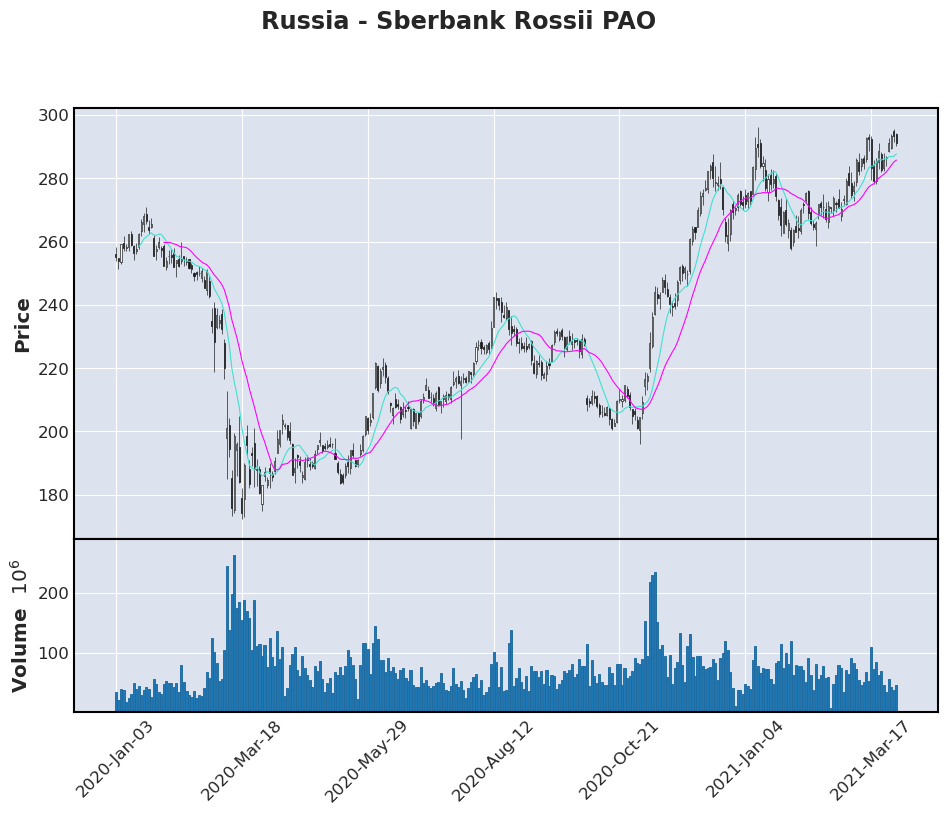

In [5]:
import mplfinance as mpf
import pandas as pd

if not isinstance(Russia.index, pd.core.indexes.datetimes.DatetimeIndex):
    Russia.set_index("Date", inplace=True)

mpf.plot(Russia, type='candle', volume=True, mav=(10, 20), figscale=1.5, title='Russia - Sberbank Rossii PAO')

In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Filter data for 2020 Q1, Q2, Q3, Q4
start_date = '2020-01-01'
end_date = '2020-12-31'
filtered_data = Russia.loc[(Russia.index >= start_date) & (Russia.index <= end_date)].copy()

# Compute moving averages
window_sizes = [7, 30, 90]
for window_size in window_sizes:
    col_name = f'{window_size}-day Moving Average'
    filtered_data.loc[:, col_name] = filtered_data['Close'].rolling(window=window_size).mean()

# Fill NaN values in 30-day and 90-day moving averages with values from 7-day moving average
filtered_data['7-day Moving Average'].fillna(filtered_data['Close'], inplace=True)
filtered_data['30-day Moving Average'].fillna(filtered_data['7-day Moving Average'], inplace=True)
filtered_data['90-day Moving Average'].fillna(filtered_data['7-day Moving Average'], inplace=True)

# Drop rows with NaN values
filtered_data.dropna(inplace=True)

# Define the features and target
features = filtered_data[['7-day Moving Average', '30-day Moving Average', '90-day Moving Average']]
target = filtered_data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Mean Squared Error: 32.23092379575817


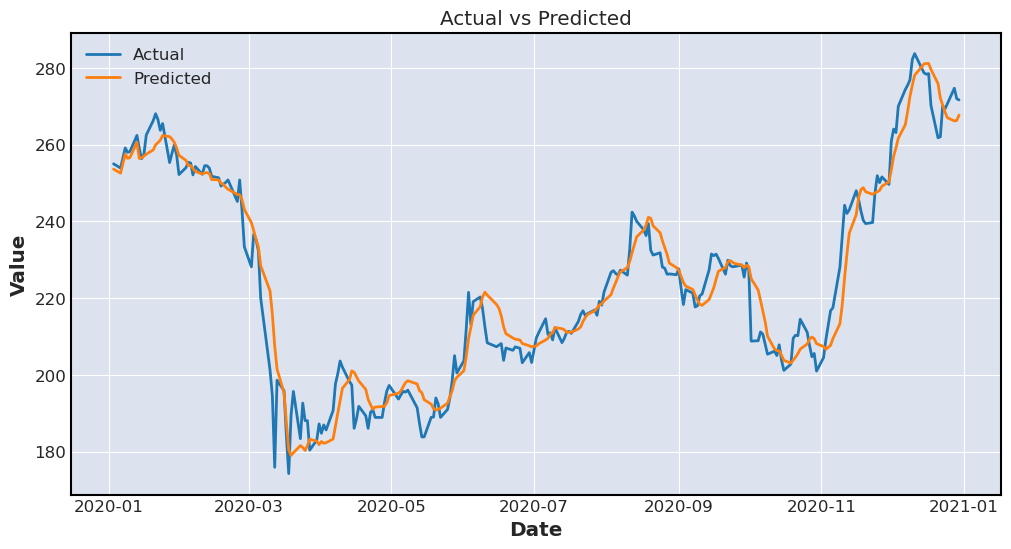

Mean Squared Error: 32.23092379575817


In [7]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(12, 6))

# Plotting actual values
plt.plot(filtered_data.index, target, label='Actual')

# Plotting predicted values
plt.plot(filtered_data.index, regressor.predict(features), label='Predicted')


# Set labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted')

# Add legend
plt.legend()

# Display the plot
plt.show()
print(f"Mean Squared Error: {mse}")

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Filter data for Q1 2021
start_date21 = '2021-01-01'
end_date21 = '2021-03-31'
q1_data = Russia.loc[(Russia.index >= start_date21) & (Russia.index <= end_date21)].copy()

# Compute moving averages for Q1 2021
window_sizes21 = [7, 30, 90]
for window_size21 in window_sizes21:
    col_name = f'{window_size21}-day Moving Average'
    q1_data[col_name] = q1_data['Close'].rolling(window=window_size21).mean()

# Fill NaN values in 30-day and 90-day moving averages with values from 7-day moving average
q1_data['30-day Moving Average'].fillna(q1_data['7-day Moving Average'], inplace=True)
q1_data['90-day Moving Average'].fillna(q1_data['7-day Moving Average'], inplace=True)

# Drop rows with NaN values
q1_data.dropna(inplace=True)

# Check if there are samples for Q1 2021 after dropping NaN values
if q1_data.shape[0] < 1:
    print("No data available for Q1 2021.")
else:
    # Define the features and target for Q1 2021
    q1_features = q1_data[['7-day Moving Average', '30-day Moving Average', '90-day Moving Average']]
    q1_target = q1_data['Close']

    # Make predictions for Q1 2021
    q1_predictions = regressor.predict(q1_features)  # Assuming 'regressor' is your trained model

    # Evaluate the model using Mean Squared Error (MSE) for Q1 2021
    q1_mse = mean_squared_error(q1_target, q1_predictions)
    print(f"Mean Squared Error (Q1 2021): {q1_mse}")


Mean Squared Error (Q1 2021): 23.78114760097834


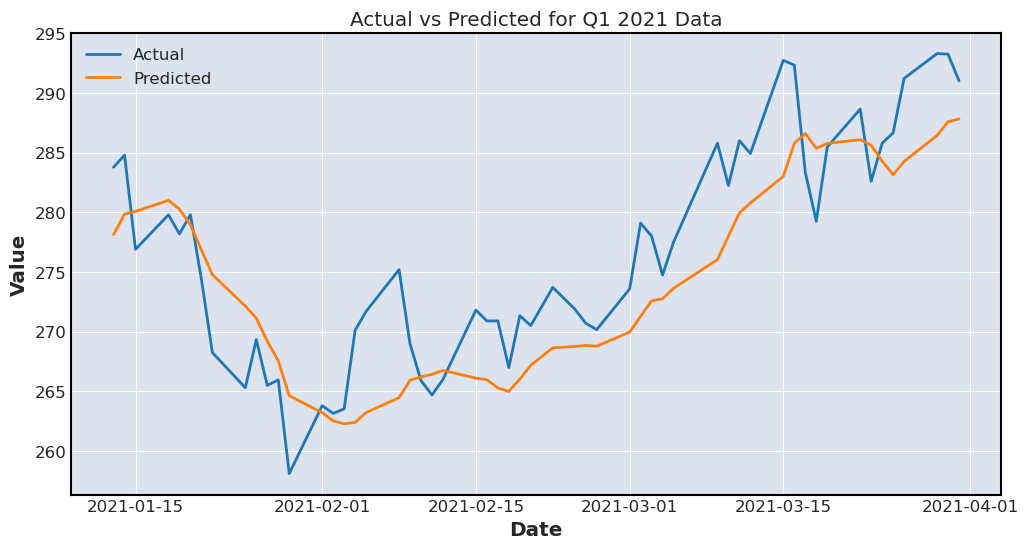

Mean Squared Error (Q1 2021): 23.78114760097834


In [9]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(12, 6))

# Plotting actual values
plt.plot(q1_data.index, q1_target, label='Actual')

# Plotting predicted values
plt.plot(q1_data.index, q1_predictions, label='Predicted')


# Set labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted for Q1 2021 Data')

# Add legend
plt.legend()

# Display the plot
plt.show()

print(f"Mean Squared Error (Q1 2021): {q1_mse}")

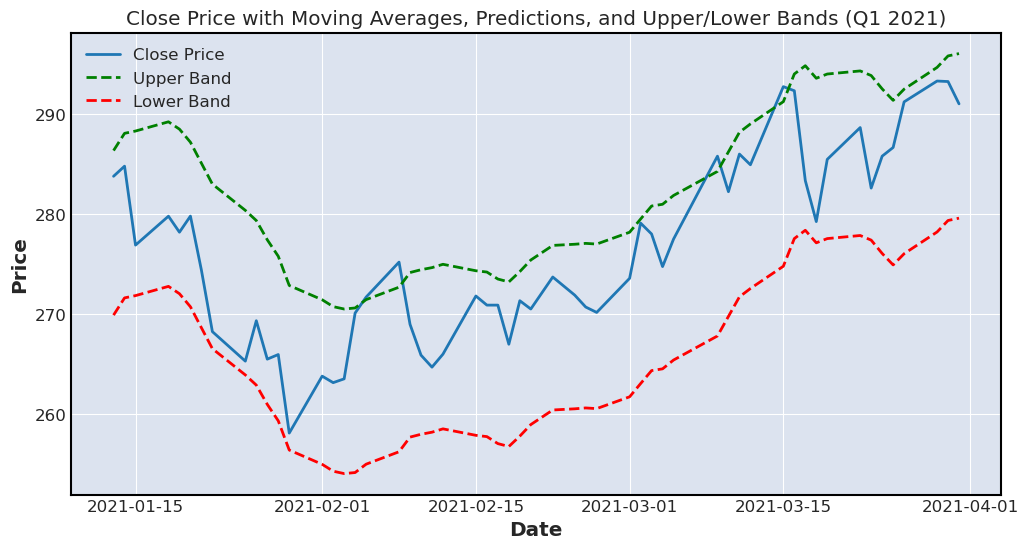

In [10]:
    import numpy as np
    
    # Calculate upper and lower bands based on the predictions
    rstd = q1_predictions.std()  # Calculating the residual standard deviation
    upper_band = q1_predictions + (1 * rstd)
    lower_band = q1_predictions - (1 * rstd)

    # Plot close prices with upper and lower bands
    plt.figure(figsize=(12, 6))
    plt.plot(q1_data.index, q1_data['Close'], label='Close Price')
    plt.plot(q1_data.index, upper_band, label='Upper Band', linestyle='--', color='g')
    plt.plot(q1_data.index, lower_band, label='Lower Band', linestyle='--', color='r')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Close Price with Moving Averages, Predictions, and Upper/Lower Bands (Q1 2021)')
    plt.legend()
    plt.show()
 

In [11]:
# Calculate upper and lower bands based on the predictions
rstd = q1_predictions.std()  # Calculating the residual standard deviation
upper_band =pd.DataFrame(q1_predictions + (.5 * rstd))
lower_band = pd.DataFrame(q1_predictions - (.5 * rstd))

# Create a new column to store the classification labels
q1_data['Classification'] = 'Hold'

# Iterate over the data and classify based on intersections
for i in range(1, q1_data.shape[0]):
    if q1_data['Close'].iloc[i] > upper_band.iloc[i][0] and q1_data['Close'].iloc[i - 1] <= upper_band.iloc[i - 1][0]:
        q1_data['Classification'].iloc[i] = 'Sell'
    elif q1_data['Close'].iloc[i] < lower_band.iloc[i][0] and q1_data['Close'].iloc[i - 1] >= lower_band.iloc[i - 1][0]:
        q1_data['Classification'].iloc[i] = 'Buy'

# Print the data with classification labels
print(q1_data[['Close', '30-day Moving Average', '90-day Moving Average', 'Classification']])

             Close  30-day Moving Average  90-day Moving Average  \
Date                                                               
2021-01-13  283.78             281.004286             281.004286   
2021-01-14  284.79             282.831429             282.831429   
2021-01-15  276.90             283.074286             283.074286   
2021-01-18  279.79             284.054286             284.054286   
2021-01-19  278.19             283.275714             283.275714   
2021-01-20  279.80             281.891429             281.891429   
2021-01-21  274.40             279.664286             279.664286   
2021-01-22  268.25             277.445714             277.445714   
2021-01-25  265.30             274.661429             274.661429   
2021-01-26  269.34             273.581429             273.581429   
2021-01-27  265.50             271.540000             271.540000   
2021-01-28  265.96             269.792857             269.792857   
2021-01-29  258.11             266.694286       

/tmp/ipykernel_20/757242668.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q1_data['Classification'].iloc[i] = 'Buy'
/tmp/ipykernel_20/757242668.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q1_data['Classification'].iloc[i] = 'Sell'


In [12]:
import pandas as pd
import plotly.graph_objects as go

# Add this line to display plots inline
%matplotlib inline

# Create traces for the buy/sell signals
buy_signals = go.Scatter(
    x=q1_data[q1_data['Classification'] == 'Buy'].index,
    y=q1_data[q1_data['Classification'] == 'Buy']['Close'],
    mode='markers',
    marker=dict(symbol='triangle-up', size=10, color='green'),
    name='Buy Signals'
)
sell_signals = go.Scatter(
    x=q1_data[q1_data['Classification'] == 'Sell'].index,
    y=q1_data[q1_data['Classification'] == 'Sell']['Close'],
    mode='markers',
    marker=dict(symbol='triangle-down', size=10, color='red'),
    name='Sell Signals'
)

# Trace for the actual price
actual_price = go.Scatter(
    x=q1_data.index,
    y=q1_data['Close'],
    mode='lines',
    name='Actual Price'
)

# Create the layout
layout = go.Layout(
    title='Stock Price with Buy/Sell Signals',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price')
)

# Create the data variable and include all the traces
data = [actual_price, buy_signals, sell_signals]

# Create the figure and plot
fig = go.Figure(data=data, layout=layout)

# Change this line to specify the rendering method as an iframe
fig.show(renderer='iframe')

**Turkey - Koc Holding AS (KCHOL)**

In [13]:
# Load the Excel file
file_path = '/kaggle/input/stockprice/2020Q1Q2Q3Q4-2021Q1.xlsx'
Turkey = pd.read_excel(file_path, sheet_name='Turkey - Koc Holding AS (KCHOL)')  

# Convert date column to datetime format
Turkey['Date'] = pd.to_datetime(Turkey['Date'], infer_datetime_format=True, errors='coerce')


# Sort the data chronologically based on date
Turkey = Turkey.sort_values('Date')


# Print the updated DataFrame
print(Turkey.head())
print(Turkey.info())

          Date  Price   Open   High    Low   Vol.  Change %
314 2020-01-02  20.38  20.42  20.44  20.24  2.53M    0.0030
313 2020-01-03   20.3   20.3  20.44  19.97  3.31M   -0.0039
312 2020-01-06  20.08  20.34  20.34  19.97  1.94M   -0.0108
311 2020-01-07  19.93  20.22  20.28  19.92  2.89M   -0.0075
310 2020-01-08  19.94  19.89  19.95  19.66  2.79M    0.0005
<class 'pandas.core.frame.DataFrame'>
Int64Index: 316 entries, 314 to 315
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      315 non-null    datetime64[ns]
 1   Price     316 non-null    object        
 2   Open      316 non-null    object        
 3   High      316 non-null    object        
 4   Low       316 non-null    object        
 5   Vol.      315 non-null    object        
 6   Change %  315 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 19.8+ KB
None


In [14]:
# Convert Vol. column to float 
Turkey['Vol.'] = Turkey['Vol.'].str.replace('[^\d.]', '', regex=True).astype(float) * 1_000_000
Turkey.rename(columns={'Vol.': 'Volume'}, inplace=True)

#wee need to drop the last column because it has diffrent data
print(Turkey.tail(5),'\n')

# Drop row 311
Turkey = Turkey.drop(index=315)


# Convert Price, Open, High, Low columns to float 
for col in ['Price', 'Open', 'High', 'Low']:
    Turkey[col] = Turkey[col].astype(float)
   
Turkey.rename(columns={'Price': 'Close'}, inplace=True)

# Print the updated DataFrame
print(Turkey.head(),'\n')
print(Turkey.info(),'\n')

          Date          Price               Open            High  \
3   2021-03-26          19.25              20.28           20.36   
2   2021-03-29           19.1              19.24           19.67   
1   2021-03-30           19.5              19.12           19.81   
0   2021-03-31          19.41              19.42           19.63   
315        NaT  Lowest: 12.38  Difference: 13.10  Average: 17.86   

                 Low      Volume  Change %  
3               19.1  21350000.0   -0.0385  
2               19.1  16560000.0   -0.0078  
1              19.03  21050000.0    0.0209  
0              19.27  13140000.0   -0.0046  
315  Change %: -4.48         NaN       NaN   

          Date  Close   Open   High    Low     Volume  Change %
314 2020-01-02  20.38  20.42  20.44  20.24  2530000.0    0.0030
313 2020-01-03  20.30  20.30  20.44  19.97  3310000.0   -0.0039
312 2020-01-06  20.08  20.34  20.34  19.97  1940000.0   -0.0108
311 2020-01-07  19.93  20.22  20.28  19.92  2890000.0   -0.0075

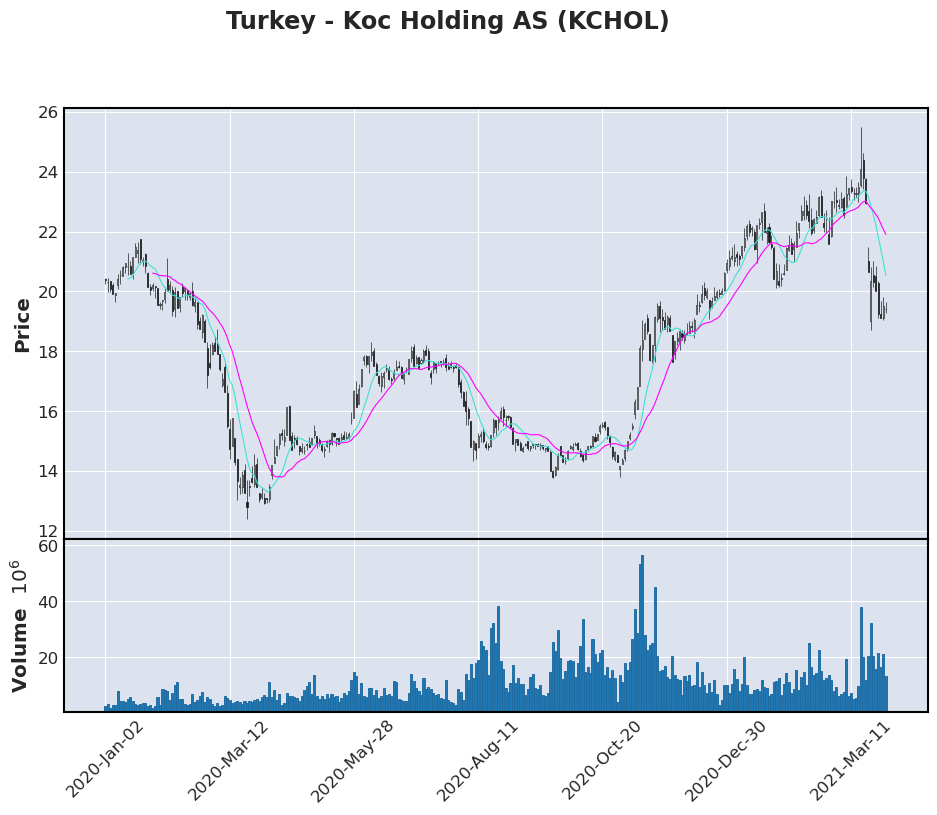

In [15]:
if not isinstance(Turkey.index, pd.core.indexes.datetimes.DatetimeIndex):
    Turkey.set_index("Date", inplace=True)

mpf.plot(Turkey, type='candle', volume=True, mav=(10, 20), figscale=1.5, title='Turkey - Koc Holding AS (KCHOL)')

In [16]:
# Filter data for 2020 Q1, Q2, Q3, Q4
start_date = '2020-01-01'
end_date = '2020-12-31'
filtered_data = Turkey.loc[(Turkey.index >= start_date) & (Turkey.index <= end_date)].copy()

# Compute moving averages
window_sizes = [7, 30, 90]
for window_size in window_sizes:
    col_name = f'{window_size}-day Moving Average'
    filtered_data.loc[:, col_name] = filtered_data['Close'].rolling(window=window_size).mean()

# Fill NaN values in 30-day and 90-day moving averages with values from 7-day moving average
filtered_data['7-day Moving Average'].fillna(filtered_data['Close'], inplace=True)
filtered_data['30-day Moving Average'].fillna(filtered_data['7-day Moving Average'], inplace=True)
filtered_data['90-day Moving Average'].fillna(filtered_data['7-day Moving Average'], inplace=True)

# Drop rows with NaN values
filtered_data.dropna(inplace=True)

# Define the features and target
features = filtered_data[['7-day Moving Average', '30-day Moving Average', '90-day Moving Average']]
target = filtered_data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.2796218897591536


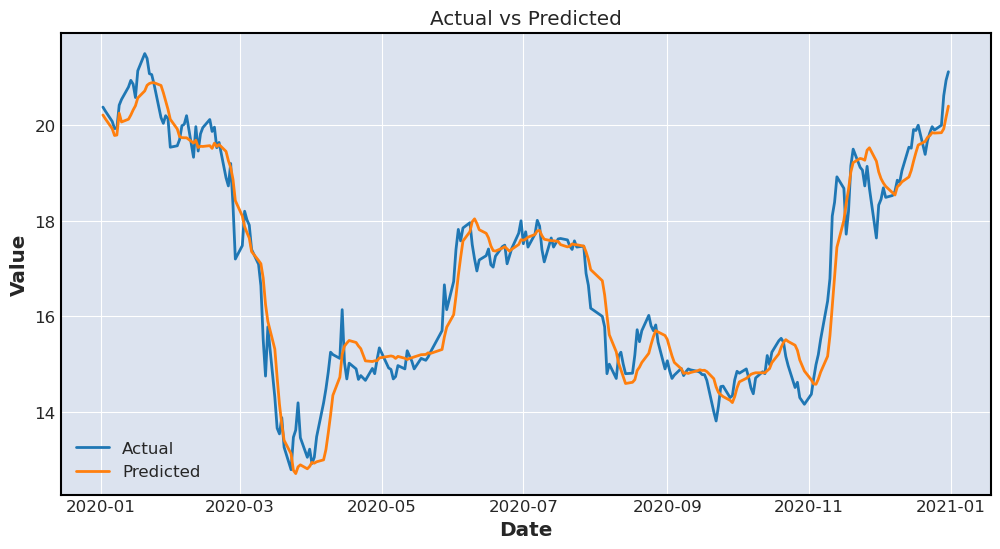

Mean Squared Error: 0.2796218897591536


In [17]:
# Increase the figure size
plt.figure(figsize=(12, 6))

# Plotting actual values
plt.plot(filtered_data.index, target, label='Actual')

# Plotting predicted values
plt.plot(filtered_data.index, regressor.predict(features), label='Predicted')


# Set labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted')

# Add legend
plt.legend()

# Display the plot
plt.show()
print(f"Mean Squared Error: {mse}")

In [18]:

# Filter data for Q1 2021
start_date21 = '2021-01-01'
end_date21 = '2021-03-31'
q1_data = Turkey.loc[(Turkey.index >= start_date21) & (Turkey.index <= end_date21)].copy()

# Compute moving averages for Q1 2021
window_sizes21 = [7, 30, 90]
for window_size21 in window_sizes21:
    col_name = f'{window_size21}-day Moving Average'
    q1_data[col_name] = q1_data['Close'].rolling(window=window_size21).mean()

# Fill NaN values in 30-day and 90-day moving averages with values from 7-day moving average
q1_data['30-day Moving Average'].fillna(q1_data['7-day Moving Average'], inplace=True)
q1_data['90-day Moving Average'].fillna(q1_data['7-day Moving Average'], inplace=True)

# Drop rows with NaN values
q1_data.dropna(inplace=True)

# Check if there are samples for Q1 2021 after dropping NaN values
if q1_data.shape[0] < 1:
    print("No data available for Q1 2021.")
else:
    # Define the features and target for Q1 2021
    q1_features = q1_data[['7-day Moving Average', '30-day Moving Average', '90-day Moving Average']]
    q1_target = q1_data['Close']

    # Make predictions for Q1 2021
    q1_predictions = regressor.predict(q1_features)  # Assuming 'regressor' is your trained model

    # Evaluate the model using Mean Squared Error (MSE) for Q1 2021
    q1_mse = mean_squared_error(q1_target, q1_predictions)
    print(f"Mean Squared Error (Q1 2021): {q1_mse}")


Mean Squared Error (Q1 2021): 0.5529523641626547


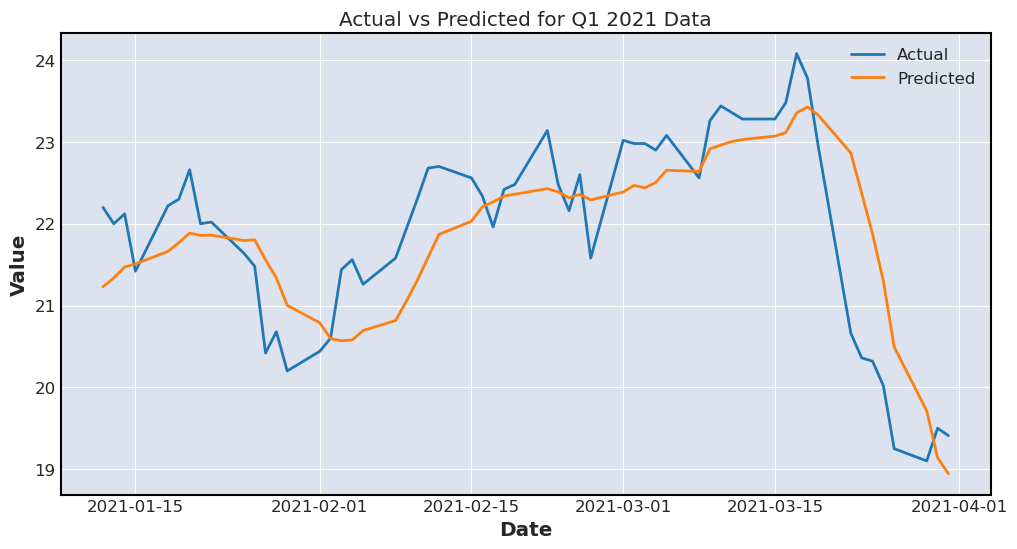

Mean Squared Error (Q1 2021): 0.5529523641626547


In [19]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(12, 6))

# Plotting actual values
plt.plot(q1_data.index, q1_target, label='Actual')

# Plotting predicted values
plt.plot(q1_data.index, q1_predictions, label='Predicted')


# Set labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted for Q1 2021 Data')

# Add legend
plt.legend()

# Display the plot
plt.show()

print(f"Mean Squared Error (Q1 2021): {q1_mse}")

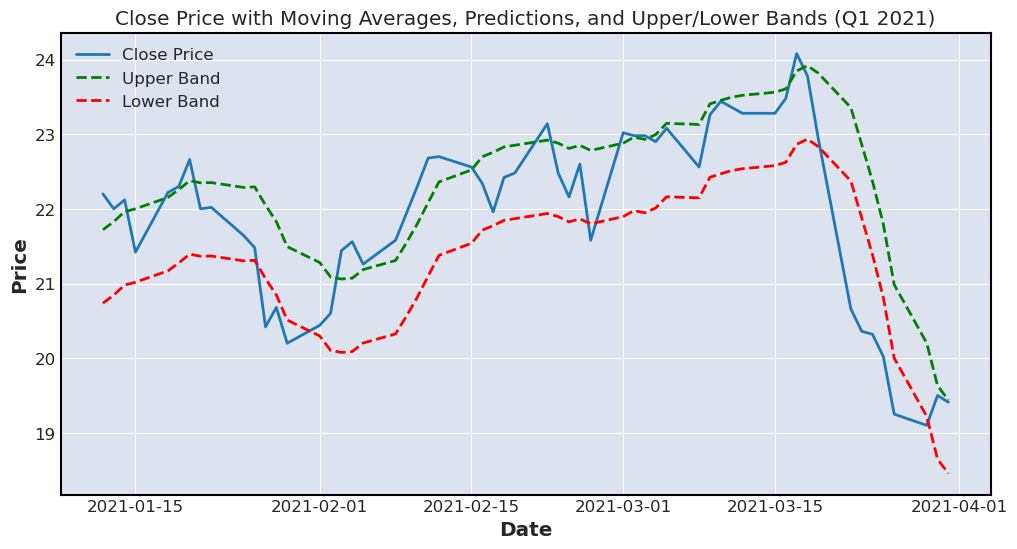

In [20]:

    # Calculate upper and lower bands based on the predictions
    rstd = q1_predictions.std()  # Calculating the residual standard deviation
    upper_band = q1_predictions + (.5 * rstd)
    lower_band = q1_predictions - (.5 * rstd)

    # Plot close prices with upper and lower bands
    plt.figure(figsize=(12, 6))
    plt.plot(q1_data.index, q1_data['Close'], label='Close Price')
    plt.plot(q1_data.index, upper_band, label='Upper Band', linestyle='--', color='g')
    plt.plot(q1_data.index, lower_band, label='Lower Band', linestyle='--', color='r')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Close Price with Moving Averages, Predictions, and Upper/Lower Bands (Q1 2021)')
    plt.legend()
    plt.show()
 

In [21]:
# Calculate upper and lower bands based on the predictions
rstd = q1_predictions.std()  # Calculating the residual standard deviation
upper_band =pd.DataFrame(q1_predictions + (.5 * rstd))
lower_band = pd.DataFrame(q1_predictions - (.5 * rstd))

# Create a new column to store the classification labels
q1_data['Classification'] = 'Hold'

# Iterate over the data and classify based on intersections
for i in range(1, q1_data.shape[0]):
    if q1_data['Close'].iloc[i] > upper_band.iloc[i][0] and q1_data['Close'].iloc[i - 1] <= upper_band.iloc[i - 1][0]:
        q1_data['Classification'].iloc[i] = 'Sell'
    elif q1_data['Close'].iloc[i] < lower_band.iloc[i][0] and q1_data['Close'].iloc[i - 1] >= lower_band.iloc[i - 1][0]:
        q1_data['Classification'].iloc[i] = 'Buy'

# Print the data with classification labels
print(q1_data[['Close', '30-day Moving Average', '90-day Moving Average', 'Classification']])

            Close  30-day Moving Average  90-day Moving Average Classification
Date                                                                          
2021-01-12  22.20              21.442857              21.442857           Hold
2021-01-13  22.00              21.557143              21.557143           Hold
2021-01-14  22.12              21.697143              21.697143           Hold
2021-01-15  21.42              21.737143              21.737143           Hold
2021-01-18  22.22              21.897143              21.897143           Sell
2021-01-19  22.30              22.008571              22.008571           Hold
2021-01-20  22.66              22.131429              22.131429           Hold
2021-01-21  22.00              22.102857              22.102857           Hold
2021-01-22  22.02              22.105714              22.105714           Hold
2021-01-25  21.64              22.037143              22.037143           Hold
2021-01-26  21.48              22.045714            

/tmp/ipykernel_20/757242668.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_20/757242668.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:

# Add this line to display plots inline
%matplotlib inline

# Create traces for the buy/sell signals
buy_signals = go.Scatter(
    x=q1_data[q1_data['Classification'] == 'Buy'].index,
    y=q1_data[q1_data['Classification'] == 'Buy']['Close'],
    mode='markers',
    marker=dict(symbol='triangle-up', size=10, color='green'),
    name='Buy Signals'
)
sell_signals = go.Scatter(
    x=q1_data[q1_data['Classification'] == 'Sell'].index,
    y=q1_data[q1_data['Classification'] == 'Sell']['Close'],
    mode='markers',
    marker=dict(symbol='triangle-down', size=10, color='red'),
    name='Sell Signals'
)

# Trace for the actual price
actual_price = go.Scatter(
    x=q1_data.index,
    y=q1_data['Close'],
    mode='lines',
    name='Actual Price'
)

# Create the layout
layout = go.Layout(
    title='Turkey Stock Price with Buy/Sell Signals',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price')
)

# Create the data variable and include all the traces
data = [actual_price, buy_signals, sell_signals]

# Create the figure and plot
fig = go.Figure(data=data, layout=layout)

# Change this line to specify the rendering method as an iframe
fig.show(renderer='iframe')

**Egypt - Medinet Nasr Housing (M**

In [23]:
# Load the Excel file
file_path = '/kaggle/input/stockprice/2020Q1Q2Q3Q4-2021Q1.xlsx'
Egypt = pd.read_excel(file_path, sheet_name='Egypt - Medinet Nasr Housing (M')  

# Convert date column to datetime format
Egypt['Date'] = pd.to_datetime(Egypt['Date'], infer_datetime_format=True, errors='coerce')


# Sort the data chronologically based on date
Egypt = Egypt.sort_values('Date')


# Print the updated DataFrame
print(Egypt.head())
print(Egypt.info())

          Date Price  Open  High   Low     Vol.  Change %
304 2020-01-02  4.81  4.81  4.87  4.78  241.60K   -0.0021
303 2020-01-05  4.41   4.7   4.7  4.33    3.76M   -0.0832
302 2020-01-06  4.28  4.16  4.44  4.12    2.52M   -0.0295
301 2020-01-08  4.41  4.19  4.59  4.15    3.52M    0.0304
300 2020-01-09  4.62  4.55   4.7  4.55    2.09M    0.0476
<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 304 to 305
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      305 non-null    datetime64[ns]
 1   Price     306 non-null    object        
 2   Open      306 non-null    object        
 3   High      306 non-null    object        
 4   Low       306 non-null    object        
 5   Vol.      305 non-null    object        
 6   Change %  305 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 19.1+ KB
None


In [24]:
# Convert Vol. column to float 
Egypt['Vol.'] = Egypt['Vol.'].str.replace('[^\d.]', '', regex=True).astype(float) * 1_000_000
Egypt.rename(columns={'Vol.': 'Volume'}, inplace=True)

#wee need to drop the last column because it has diffrent data
print(Egypt.tail(5),'\n')

# Drop row 305
Egypt = Egypt.drop(index=305)


# Convert Price, Open, High, Low columns to float 
for col in ['Price', 'Open', 'High', 'Low']:
    Egypt[col] = Egypt[col].astype(float)
   
Egypt.rename(columns={'Price': 'Close'}, inplace=True)

# Print the updated DataFrame
print(Egypt.head(),'\n')
print(Egypt.info(),'\n')

          Date         Price              Open           High  \
3   2021-03-28          3.71              3.76           3.76   
2   2021-03-29           3.7              3.69           3.73   
1   2021-03-30          3.73              3.71           3.76   
0   2021-03-31          3.75              3.74           3.82   
305        NaT  Lowest: 2.40  Difference: 2.52  Average: 3.55   

                  Low     Volume  Change %  
3                3.68  2340000.0    0.0000  
2                3.68  1250000.0   -0.0027  
1                3.67  3430000.0    0.0081  
0                3.71  1570000.0    0.0054  
305  Change %: -22.20        NaN       NaN   

          Date  Close  Open  High   Low       Volume  Change %
304 2020-01-02   4.81  4.81  4.87  4.78  241600000.0   -0.0021
303 2020-01-05   4.41  4.70  4.70  4.33    3760000.0   -0.0832
302 2020-01-06   4.28  4.16  4.44  4.12    2520000.0   -0.0295
301 2020-01-08   4.41  4.19  4.59  4.15    3520000.0    0.0304
300 2020-01-09   4.62 

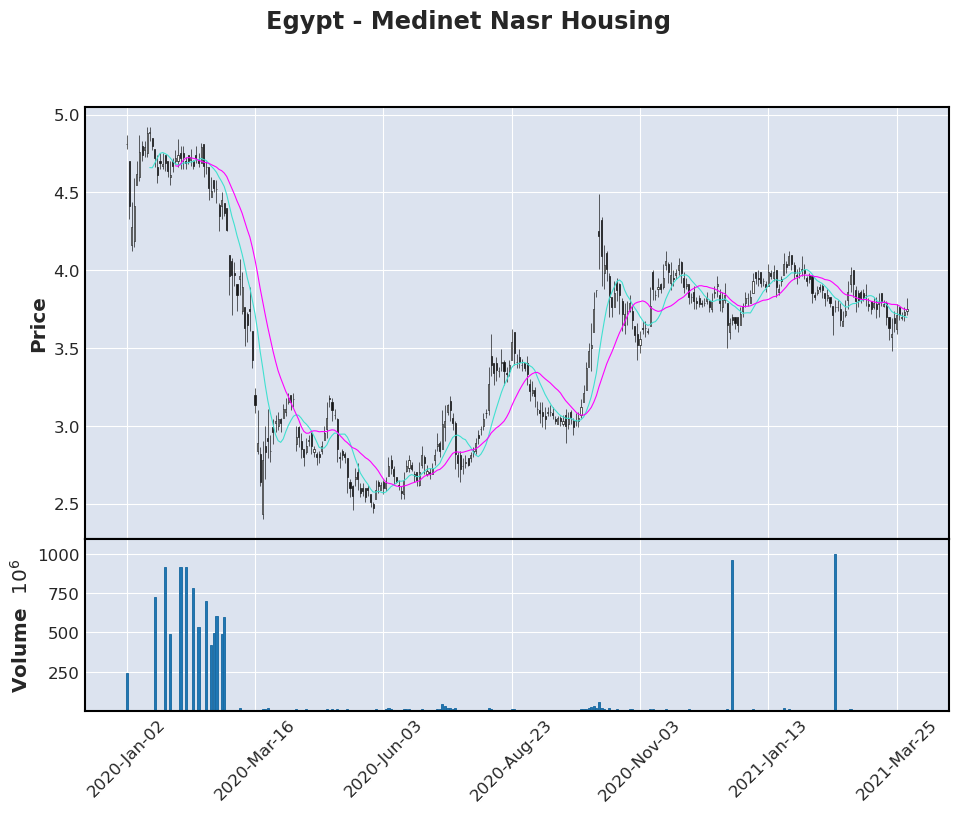

In [25]:
if not isinstance(Egypt.index, pd.core.indexes.datetimes.DatetimeIndex):
    Egypt.set_index("Date", inplace=True)

mpf.plot(Egypt, type='candle', volume=True, mav=(10, 20), figscale=1.5, title='Egypt - Medinet Nasr Housing')

In [26]:
# Filter data for 2020 Q1, Q2, Q3, Q4
start_date = '2020-01-01'
end_date = '2020-12-31'
filtered_data = Egypt.loc[(Egypt.index >= start_date) & (Egypt.index <= end_date)].copy()

# Compute moving averages
window_sizes = [7, 30, 90]
for window_size in window_sizes:
    col_name = f'{window_size}-day Moving Average'
    filtered_data.loc[:, col_name] = filtered_data['Close'].rolling(window=window_size).mean()

# Fill NaN values in 30-day and 90-day moving averages with values from 7-day moving average
filtered_data['7-day Moving Average'].fillna(filtered_data['Close'], inplace=True)
filtered_data['30-day Moving Average'].fillna(filtered_data['7-day Moving Average'], inplace=True)
filtered_data['90-day Moving Average'].fillna(filtered_data['7-day Moving Average'], inplace=True)

# Drop rows with NaN values
filtered_data.dropna(inplace=True)

# Define the features and target
features = filtered_data[['7-day Moving Average', '30-day Moving Average', '90-day Moving Average']]
target = filtered_data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.010916023307839294


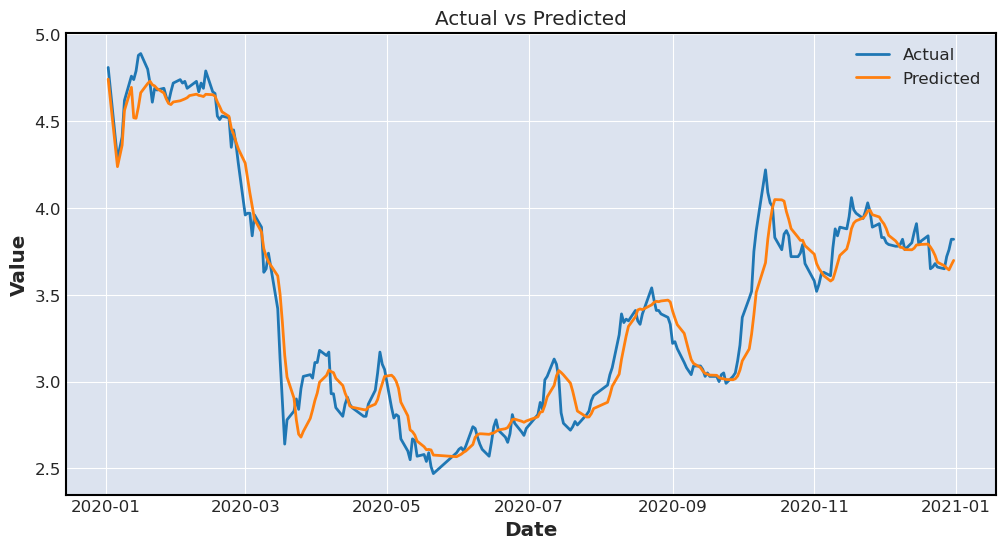

Mean Squared Error: 0.010916023307839294


In [27]:
# Increase the figure size
plt.figure(figsize=(12, 6))

# Plotting actual values
plt.plot(filtered_data.index, target, label='Actual')

# Plotting predicted values
plt.plot(filtered_data.index, regressor.predict(features), label='Predicted')


# Set labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted')

# Add legend
plt.legend()

# Display the plot
plt.show()
print(f"Mean Squared Error: {mse}")

In [28]:

# Filter data for Q1 2021
start_date21 = '2021-01-01'
end_date21 = '2021-03-31'
q1_data = Egypt.loc[(Egypt.index >= start_date21) & (Egypt.index <= end_date21)].copy()

# Compute moving averages for Q1 2021
window_sizes21 = [7, 30, 90]
for window_size21 in window_sizes21:
    col_name = f'{window_size21}-day Moving Average'
    q1_data[col_name] = q1_data['Close'].rolling(window=window_size21).mean()

# Fill NaN values in 30-day and 90-day moving averages with values from 7-day moving average
q1_data['30-day Moving Average'].fillna(q1_data['7-day Moving Average'], inplace=True)
q1_data['90-day Moving Average'].fillna(q1_data['7-day Moving Average'], inplace=True)

# Drop rows with NaN values
q1_data.dropna(inplace=True)

# Check if there are samples for Q1 2021 after dropping NaN values
if q1_data.shape[0] < 1:
    print("No data available for Q1 2021.")
else:
    # Define the features and target for Q1 2021
    q1_features = q1_data[['7-day Moving Average', '30-day Moving Average', '90-day Moving Average']]
    q1_target = q1_data['Close']

    # Make predictions for Q1 2021
    q1_predictions = regressor.predict(q1_features)  # Assuming 'regressor' is your trained model

    # Evaluate the model using Mean Squared Error (MSE) for Q1 2021
    q1_mse = mean_squared_error(q1_target, q1_predictions)
    print(f"Mean Squared Error (Q1 2021): {q1_mse}")


Mean Squared Error (Q1 2021): 0.004262963252100137


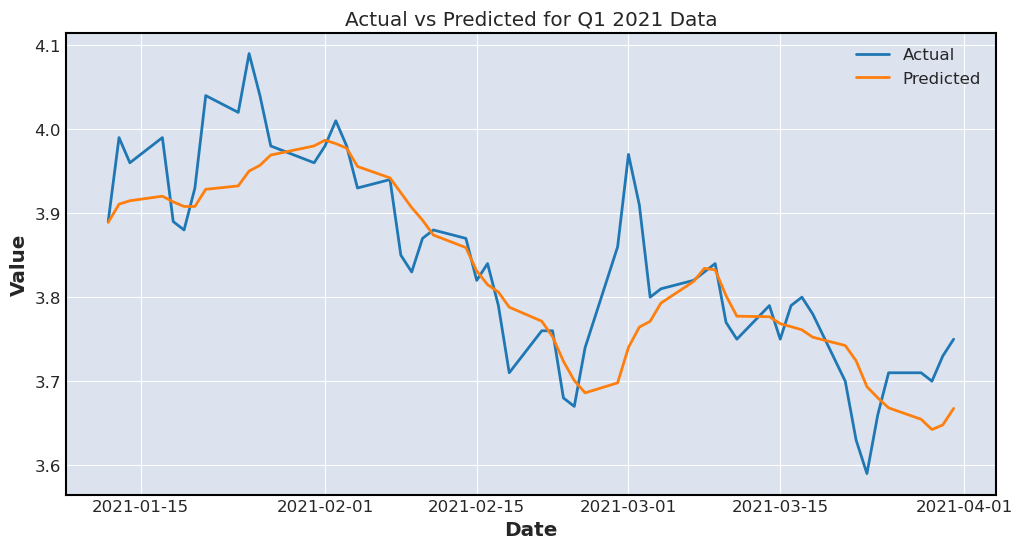

Mean Squared Error (Q1 2021): 0.004262963252100137


In [29]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(12, 6))

# Plotting actual values
plt.plot(q1_data.index, q1_target, label='Actual')

# Plotting predicted values
plt.plot(q1_data.index, q1_predictions, label='Predicted')


# Set labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted for Q1 2021 Data')

# Add legend
plt.legend()

# Display the plot
plt.show()

print(f"Mean Squared Error (Q1 2021): {q1_mse}")

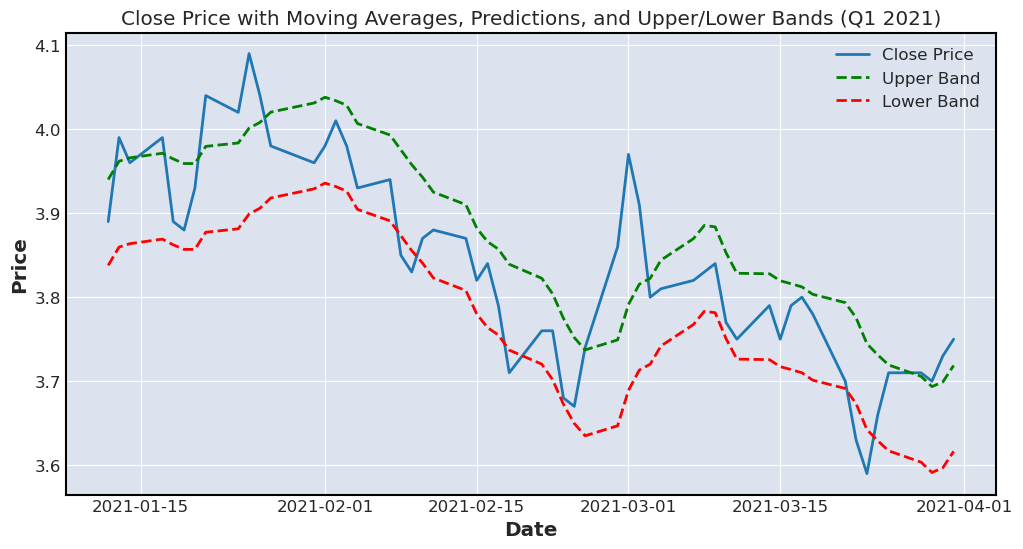

In [30]:

    # Calculate upper and lower bands based on the predictions
    rstd = q1_predictions.std()  # Calculating the residual standard deviation
    upper_band = q1_predictions + (.5 * rstd)
    lower_band = q1_predictions - (.5 * rstd)

    # Plot close prices with upper and lower bands
    plt.figure(figsize=(12, 6))
    plt.plot(q1_data.index, q1_data['Close'], label='Close Price')
    plt.plot(q1_data.index, upper_band, label='Upper Band', linestyle='--', color='g')
    plt.plot(q1_data.index, lower_band, label='Lower Band', linestyle='--', color='r')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Close Price with Moving Averages, Predictions, and Upper/Lower Bands (Q1 2021)')
    plt.legend()
    plt.show()
 

In [31]:
# Calculate upper and lower bands based on the predictions
rstd = q1_predictions.std()  # Calculating the residual standard deviation
upper_band =pd.DataFrame(q1_predictions + (.5 * rstd))
lower_band = pd.DataFrame(q1_predictions - (.5 * rstd))

# Create a new column to store the classification labels
q1_data['Classification'] = 'Hold'

# Iterate over the data and classify based on intersections
for i in range(1, q1_data.shape[0]):
    if q1_data['Close'].iloc[i] > upper_band.iloc[i][0] and q1_data['Close'].iloc[i - 1] <= upper_band.iloc[i - 1][0]:
        q1_data['Classification'].iloc[i] = 'Sell'
    elif q1_data['Close'].iloc[i] < lower_band.iloc[i][0] and q1_data['Close'].iloc[i - 1] >= lower_band.iloc[i - 1][0]:
        q1_data['Classification'].iloc[i] = 'Buy'

# Print the data with classification labels
print(q1_data[['Close', '30-day Moving Average', '90-day Moving Average', 'Classification']])

            Close  30-day Moving Average  90-day Moving Average Classification
Date                                                                          
2021-01-12   3.89               3.912857               3.912857           Hold
2021-01-13   3.99               3.935714               3.935714           Sell
2021-01-14   3.96               3.940000               3.940000           Hold
2021-01-17   3.99               3.945714               3.945714           Sell
2021-01-18   3.89               3.938571               3.938571           Hold
2021-01-19   3.88               3.932857               3.932857           Hold
2021-01-20   3.93               3.932857               3.932857           Hold
2021-01-21   4.04               3.954286               3.954286           Sell
2021-01-24   4.02               3.958571               3.958571           Hold
2021-01-25   4.09               3.977143               3.977143           Hold
2021-01-26   4.04               3.984286            

/tmp/ipykernel_20/757242668.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_20/757242668.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:

# Add this line to display plots inline
%matplotlib inline

# Create traces for the buy/sell signals
buy_signals = go.Scatter(
    x=q1_data[q1_data['Classification'] == 'Buy'].index,
    y=q1_data[q1_data['Classification'] == 'Buy']['Close'],
    mode='markers',
    marker=dict(symbol='triangle-up', size=10, color='green'),
    name='Buy Signals'
)
sell_signals = go.Scatter(
    x=q1_data[q1_data['Classification'] == 'Sell'].index,
    y=q1_data[q1_data['Classification'] == 'Sell']['Close'],
    mode='markers',
    marker=dict(symbol='triangle-down', size=10, color='red'),
    name='Sell Signals'
)

# Trace for the actual price
actual_price = go.Scatter(
    x=q1_data.index,
    y=q1_data['Close'],
    mode='lines',
    name='Actual Price'
)

# Create the layout
layout = go.Layout(
    title='EGEYPT Stock Price with Buy/Sell Signals',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price')
)

# Create the data variable and include all the traces
data = [actual_price, buy_signals, sell_signals]

# Create the figure and plot
fig = go.Figure(data=data, layout=layout)

# Change this line to specify the rendering method as an iframe
fig.show(renderer='iframe')